# Project: Wrangling and Analyze Data

#  Project Details

Tasks in this project are:

* Data wrangling, which consists of:
  * Gathering data
  * Assesing data
  * Cleaning data
  


In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import time
import tweepy
import requests
import os
import json
import warnings
import matplotlib
from timeit import default_timer as timer

In [2]:
#read data
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Data Gathering

In [3]:
#gather data
#make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
     os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(image_request.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
consumer_key = "Fx0w7gbXd8epT9St4WlUlmooU"
consumer_secret = "hg4OauLvhi2n3Udrf7Y5GU1RmQb9d8RjEDLTMXlkYfkbShYU1Z"
access_token = "1513443975163691012-jdRoJA2Mf2hFMVBUjkS4dHXA9ayyEh"
access_secret = "1CMJXksz30pP92iGWnmjzVcmLbiu8XGEDm2d39a5xQJdd"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
with open('tweet_json.txt', 'w', encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue
            
twitter_list = []

for line in open("tweet_json.txt", "r"):
    twitter_data = json.loads(line)
   
    twitter_list.append({'tweet_id':twitter_data['id_str'],
                         'retweet_count':twitter_data['retweet_count'],
                         'favorite_count':twitter_data['favorite_count'],
                         'followers_count':twitter_data['user']['followers_count']})

Rate limit reached. Sleeping for: 738
Rate limit reached. Sleeping for: 739


In [9]:
twitter_data  = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

# Twitter API &JSON

## Assessing Data

In [10]:
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7054,33937,9236490
1,892177421306343426,5330,29425,9236490
2,891815181378084864,3504,22143,9236490
3,891689557279858688,7263,37064,9236490
4,891327558926688256,7805,35432,9236490


In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null object
retweet_count      2327 non-null int64
favorite_count     2327 non-null int64
followers_count    2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.duplicated().sum()

0

In [46]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [49]:
twitter_data.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [51]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Rusty          6
Koda           6
Stanley        6
Milo           6
Oscar          6
Dave           6
Scout          6
Bella          6
Jack           6
Jax            6
Leo            6
Finn           5
            ... 
Sephie         1
Amy            1
Meera          1
Chubbs         1
Hubertson      1
Kenzie         1
Bayley         1
Karma          1
Brandy         1
Banjo          1
Barclay        1
Jebberson      1
Walker         1
Oddie          1
Jim            1
Thor           1
Coleman        1
Reptar         1
Acro           1
Donny          1
Danny          1
Shelby         1
Jimbo          1
Daniel         1
Alfy           1
Bloo           1
Evy            1
Butters       

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [54]:
twitter_data.nunique()

tweet_id           2327
retweet_count      1659
favorite_count     1979
followers_count      25
dtype: int64

In [56]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [22]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [66]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null object
retweet_count      2327 non-null int64
favorite_count     2327 non-null int64
followers_count    2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


# Quality issues

### Twitter archive table

1. Keep original ratings(no tweets) that have images

2. Drop columns not needed for analysis.

3. Erroneous datatypes in these columns(tweet_id, rating_denominator, rating_numerator, in_reply_to_status_id,                    in_reply_to_user_id, timestamp.

4. Correct numerators with decimals

5. Missing values in 'name' and dog stages represented as 'None.

6. Some records have more than on dog stage

7. Missing URLs in expanded_urls

8. Source columns is in HTML-formatted string

9. Error in dog names(e.g a, an, actually) are not dog's name.

10. Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.

11. text column includes a text and a short link.

### Image predicition table

1. Erroneous dataype(tweet_id)

2. Missing images(only 2075 counts out of possible 2356)

### Twitter API table

1. Erroneous datatype(tweet_id)

2. Missing tweets

### Tidiness issues

##### Twitter archive table

. doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named 'dog_stage'

##### Twitter API table

. Twitter API table columns(retweet_count, favorite_count, followers_count)should be added to twitter archive table.

##### Image predicition table

. Image predicion table should be added to twitter_archive_table.


### Twitter archive table


### Clean


In [67]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
twitterapi_clean = twitter_data.copy()

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define: Keeping the original ratings that have images.

#### Code

In [69]:
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#### Test

In [70]:
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


#### Define: Drop columns not needed for analysis.

#### Code

In [71]:
#get the column names of twitter_archive_clean
print(list(archive_clean))

#CODE: Delete columns no needed
archive_clean = archive_clean.drop(['source',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


##### Test

In [72]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Define: Erroneous datatype fix.

#### Code

In [73]:
#convert tweet id to str from twitter_Archive, image_predictions, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

#convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#convert source to category datatype
#archive_clean.source = archive_clean.source.astype('category')

In [74]:
#test
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 266.9+ KB


####  Define: Correct numerator with decimals

#### Code

In [75]:
#check to see if some columns were not extracted properly to capture decimals

with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"\d+\.\d*\/\d+")]
                             [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Define : Now that we know the affected rows that didnt extract properly, lets fix that

#### Code

In [76]:
#convert float to datatype
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator', 'rating_denominator']].astype(float)
                                                                                                                            

#update values
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator' ] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator' ] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208 ), 'rating_numerator' ] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator' ] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator' ] = 11.26

#### Test

In [118]:
#confirm changes
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])
                          

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


#### Define : Incorrect dog names

In [79]:
archive_clean.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

#### code

In [80]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
#confirm changes
archive_clean.name.value_counts()

None        784
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Daisy         7
Toby          7
Bailey        6
Bo            6
Stanley       6
Koda          6
Jax           6
Bella         6
Oscar         6
Rusty         5
Chester       5
Bentley       5
Dave          5
Scout         5
Leo           5
Buddy         5
Louis         5
Milo          5
Winnie        4
Cassie        4
           ... 
Smiley        1
Lassie        1
Canela        1
Jeremy        1
Fwed          1
Finnegus      1
Lilah         1
Nida          1
Ben           1
Blue          1
Chuck         1
Jazzy         1
Gòrdón        1
Harry         1
Angel         1
Ebby          1
Herb          1
Dutch         1
Jaycob        1
Eriq          1
Kobe          1
Brat          1
Barney        1
Skye          1
Bauer         1
Kody          1
Shadoe        1
Pinot         1
Fiji          1
Walker        1
Name: name, Length: 931,

#### define: some records have more then one dog stage

#### code

In [82]:
archive_clean['add_all'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [83]:
archive_clean.add_all.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: add_all, dtype: int64

In [84]:
#create function to check dog stages
def check_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #means it has more than one dag stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'
archive_clean['dog_stage'] = archive_clean.apply(check_stages, axis=1)

#### Test

#### Test

In [85]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
add_all               2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 300.9+ KB


#### define : Drop unused columns

#### code

In [86]:
#drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'add_all'], axis=1, inplace=True)

In [88]:
#convery to category datatype
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### Test

In [89]:
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 201.3+ KB


In [90]:
#match deleted columns
archive_clean.dog_stage.value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

In [91]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 201.3+ KB


#### Define: Source column is in HTML-formatted string, not a normal string.

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### code

In [124]:
#extract values
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<',expand = True)

In [125]:
#confirm changes
archive_clean.source.value_counts()

#### Define : Remove hyperlinks in tweets

https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### code

In [94]:
def htmlink(x):
    http_pos = x.find("http")
    #if no link, retain row
    if http_pos == -1:
        x=x
    else:
        #remove space before link to end
        x = x[:http_pos - 1]
    return x
archive_clean.text = archive_clean.text.apply(htmlink)

#### test

In [95]:
#confirm changes to show no hyperlink in columns again
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

### Tidiness

#### Define: Lets move twitter api table and image predicition table to twitter archive table

#### code

In [96]:
#merge the two tables

archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')

#### test

In [97]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null category
retweet_count         2146 non-null float64
favorite_count        2146 non-null float64
followers_count       2146 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog        

#### define : Lets drop rows with no image

#### code

In [98]:
#drop rows with no image
archive_clean.dropna(axis = 0, inplace=True)

#### test

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 2145
Data columns (total 21 columns):
tweet_id              1965 non-null object
timestamp             1965 non-null datetime64[ns]
text                  1965 non-null object
rating_numerator      1965 non-null float64
rating_denominator    1965 non-null float64
name                  1965 non-null object
dog_stage             1965 non-null category
retweet_count         1965 non-null float64
favorite_count        1965 non-null float64
followers_count       1965 non-null float64
jpg_url               1965 non-null object
img_num               1965 non-null float64
p1                    1965 non-null object
p1_conf               1965 non-null float64
p1_dog                1965 non-null object
p2                    1965 non-null object
p2_conf               1965 non-null float64
p2_dog                1965 non-null object
p3                    1965 non-null object
p3_conf               1965 non-null float64
p3_dog        

#### Save cleaned data

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [101]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [102]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 21 columns):
tweet_id              1965 non-null int64
timestamp             1965 non-null object
text                  1965 non-null object
rating_numerator      1965 non-null float64
rating_denominator    1965 non-null float64
name                  1965 non-null object
dog_stage             1965 non-null object
retweet_count         1965 non-null float64
favorite_count        1965 non-null float64
followers_count       1965 non-null float64
jpg_url               1965 non-null object
img_num               1965 non-null float64
p1                    1965 non-null object
p1_conf               1965 non-null float64
p1_dog                1965 non-null bool
p2                    1965 non-null object
p2_conf               1965 non-null float64
p2_dog                1965 non-null bool
p3                    1965 non-null object
p3_conf               1965 non-null float64
p3_dog                1965 no

We have to convert our types again because they lost it after we saved to csv.

In [119]:
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [145]:
#change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype(str)
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(str)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(str)
#twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [132]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 21 columns):
tweet_id              1965 non-null object
timestamp             1965 non-null datetime64[ns]
text                  1965 non-null object
rating_numerator      1965 non-null object
rating_denominator    1965 non-null object
name                  1965 non-null object
dog_stage             1965 non-null object
retweet_count         1965 non-null object
favorite_count        1965 non-null object
followers_count       1965 non-null object
jpg_url               1965 non-null object
img_num               1965 non-null float64
p1                    1965 non-null object
p1_conf               1965 non-null float64
p1_dog                1965 non-null bool
p2                    1965 non-null object
p2_conf               1965 non-null float64
p2_dog                1965 non-null bool
p3                    1965 non-null object
p3_conf               1965 non-null float64
p3_dog                196

#### WeRateDogs Retweet over time


In [134]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_archive_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1965
dtype: int64

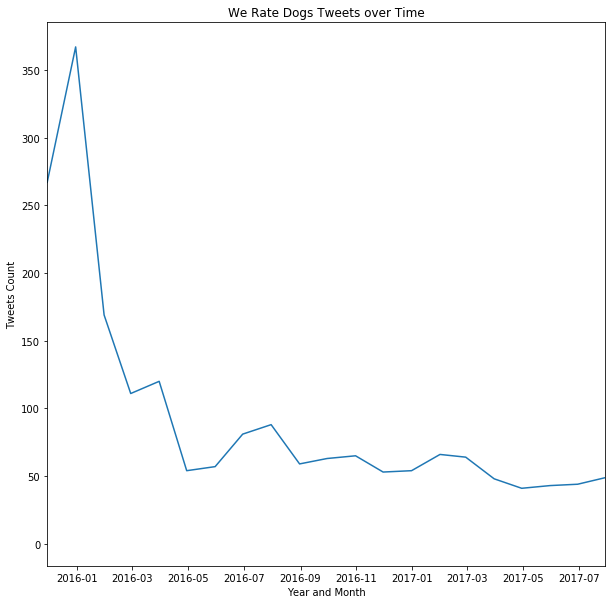

In [144]:
import datetime
sns.set_context()

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

#### Most popular dog name

In [146]:
pname = twitter_archive_master.name.value_counts()[1:10]

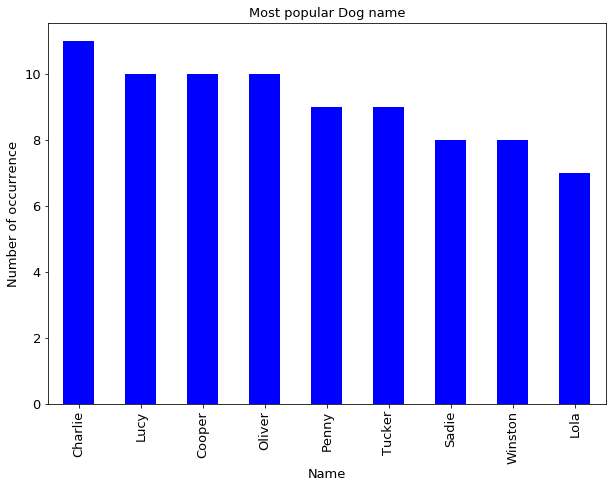

In [147]:
#plot
g_bar=pname.plot.bar(color='blue', fontsize = 13)


g_bar.figure.set_size_inches(10,7)

plt.title('Most popular Dog name', color='black', fontsize = '13')
plt.xlabel('Name', color='black', fontsize ='13')
plt.ylabel('Number of occurrence', color='black', fontsize='13');

### Is there a correlation between Favorite and Retweet?

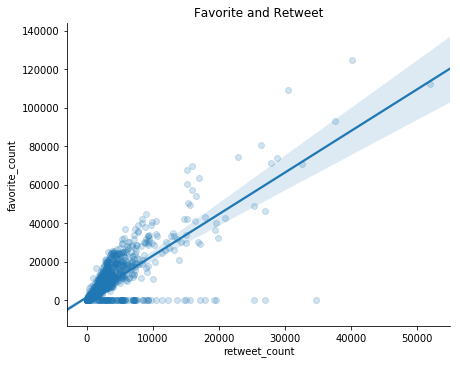

In [116]:
#correlation btw profit and budget
import seaborn as sns;
sns.lmplot(x="retweet_count", y = "favorite_count", data = twitter_archive_master, size = 5, aspect = 1.3, scatter_kws = {'alpha':1/5})
plt.title('Favorite and Retweet');

In [117]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master ['retweet_count'])

0.79104702846811659

The above scatter plot shows there is a positive correaltion between favorite and Retweet.